In [1]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'ALL_10') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [11]:
METHOD_LIST = ['ExtraTrees', 'CART', 'RandomForest', 'GBM', 'AdaBoost', 'LR', 'SVM', 'NaiveBayes', 'MLNN'] # XGB
Runs = []
nruns = 1
SCALER = "standard" # minmax, standard, normaliser
GROUPING = "mean"
DIM_TYPE =  "PCA"   # "LDA", "PCA"
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
for i in range(0, nruns):
    Rocket.SEED = np.random.randint(0,10000)
    MODELS  = []
    for idx, METHOD in enumerate(METHOD_LIST):
        preds, class_model, accuracy = Rocket.classify_treatment(model_type = METHOD, 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
        MODELS.append({'method': METHOD, 'model': class_model})
        ACC = ACC.append(accuracy, ignore_index= True)
        preds = [pred_[1]for pred_ in preds]
        #len(Rocket.DATA_merged[Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])])
        if Results is None:
            Results = Rocket.DATA_merged_processed.copy()
        Results['pred'] = preds
        Results['method'] = METHOD
        if idx == 0:
            AllResults = Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]]
        else:
            AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 
                                                    'pred', 
                                                    'method', 
                                                    Rocket.MODEL_PARAMETERS['target']]], 
                                      ignore_index = True)

    ####
    ####



+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Reducing dimensionality
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
MODEL: ET accuracy:  0.568965517241 +/-: 0.000337801318776
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Reducing dimensionality
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
MODEL: CART accuracy:  0.603448275862 +/-: 0.0121563434584
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Reducing dimensionality
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++

C:\Users\Bram van Es\DEV\RexR\rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


  97 - L= 1.1329707 - Gamma=38.6830164 (M=  40) - s=0.0100
  98 - L= 1.1329707 - Gamma=38.6830129 (M=  40) - s=0.0100
  99 - L= 1.1329707 - Gamma=38.6834101 (M=  40) - s=0.0100
 100 - L= 1.1329707 - Gamma=38.6834108 (M=  40) - s=0.0100
 101 - L= 1.1329707 - Gamma=38.6834099 (M=  40) - s=0.0100
 102 - L= 1.1329707 - Gamma=38.6834104 (M=  40) - s=0.0100
 103 - L= 1.1329708 - Gamma=38.6834110 (M=  40) - s=0.0100
 104 - L= 1.1329708 - Gamma=38.6834108 (M=  40) - s=0.0100
 105 - L= 1.1329708 - Gamma=38.6834116 (M=  40) - s=0.0100
 106 - L= 1.1329708 - Gamma=38.6834116 (M=  40) - s=0.0100
Stopping at iteration 106 - max_delta_ml=2.469800984540799e-07
L=1.1329707635770077 - Gamma=38.68341159127109 (M=40) - s=0.01
Initial alpha = [[ 0.11807905]]
   1 - L=-1077.0220858 - Gamma= 1.9999150 (M=   2) - s=0.0100
   2 - L=-910.2413932 - Gamma= 2.9998509 (M=   3) - s=0.0100
   3 - L=-806.7905169 - Gamma= 3.9997479 (M=   4) - s=0.0100
   4 - L=-699.6665609 - Gamma= 4.9996485 (M=   5) - s=0.0100
   5 - 

  19 - L=-230.0907874 - Gamma=19.9959958 (M=  20) - s=0.0100
  20 - L=-210.1580247 - Gamma=20.9955650 (M=  21) - s=0.0100
  21 - L=-193.6642092 - Gamma=21.9950446 (M=  22) - s=0.0100
  22 - L=-177.5898659 - Gamma=22.9945108 (M=  23) - s=0.0100
  23 - L=-162.1321658 - Gamma=23.9939557 (M=  24) - s=0.0100
  24 - L=-147.0627703 - Gamma=24.9933863 (M=  25) - s=0.0100
  25 - L=-132.7411961 - Gamma=25.9927874 (M=  26) - s=0.0100
  26 - L=-119.3249074 - Gamma=26.9921483 (M=  27) - s=0.0100
  27 - L=-106.1367819 - Gamma=27.9914982 (M=  28) - s=0.0100
  28 - L=-93.5013765 - Gamma=28.9908197 (M=  29) - s=0.0100
  29 - L=-82.3001924 - Gamma=29.9900548 (M=  30) - s=0.0100
  30 - L=-71.7977654 - Gamma=30.9892394 (M=  31) - s=0.0100
  31 - L=-62.0680099 - Gamma=31.9883596 (M=  32) - s=0.0100
  32 - L=-54.0415301 - Gamma=32.9872945 (M=  33) - s=0.0100
  33 - L=-47.5974883 - Gamma=33.9859702 (M=  34) - s=0.0100
  34 - L=-41.9324920 - Gamma=34.9844657 (M=  35) - s=0.0100
  35 - L=-36.6959491 - Gamma=35

In [ ]:
for i in range(0, nruns):
    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "RVM", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "RVM"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]], ignore_index = True)

    ####
    ####

In [13]:
nruns = 3
for i in range(0, nruns):
    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "DNN", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "DNN"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]],
                                   ignore_index = True)

    AllResults[Rocket.MODEL_PARAMETERS['ID']] = AllResults[Rocket.MODEL_PARAMETERS['ID']].astype('str')
    AllResults = AllResults.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
    #AllResults[AllResults['Treatment_risk_group_in_ALL10'].notnull()]
    ####
    ####
    Runs.append(AllResults)

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Reducing dimensionality
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
Train on 46 samples, validate on 12 samples
Epoch 1/5
46/46 [==============================] - 0s - loss: 0.7484 - acc: 0.5652 - val_loss: 0.6462 - val_acc: 0.5833
Epoch 2/5
46/46 [==============================] - 0s - loss: 0.6239 - acc: 0.5652 - val_loss: 0.5924 - val_acc: 0.5833
Epoch 3/5
46/46 [==============================] - 0s - loss: 0.5454 - acc: 0.5652 - val_loss: 0.6386 - val_acc: 0.5833
Epoch 4/5
46/46 [==============================] - 0s - loss: 0.4549 - acc: 0.5870 - val_loss: 0.6513 - val_acc: 0.5833
Epoch 5/5
46/46 [==============================] - 0s - loss: 0.3859 - acc: 0.7609 - val_loss: 0.6991 - val_acc: 0.5833
Train on 46 samples, validate on 12 samples
Epoch 1/5
46/46 [============================

46/46 [==============================] - 0s - loss: 0.4718 - acc: 0.6957 - val_loss: 0.4093 - val_acc: 0.9167
Epoch 2/5
46/46 [==============================] - 0s - loss: 0.3900 - acc: 0.9130 - val_loss: 0.3832 - val_acc: 0.9167
Epoch 3/5
46/46 [==============================] - 0s - loss: 0.3337 - acc: 0.9783 - val_loss: 0.3666 - val_acc: 0.9167
Epoch 4/5
46/46 [==============================] - 0s - loss: 0.2943 - acc: 1.0000 - val_loss: 0.3562 - val_acc: 0.9167
Epoch 5/5
46/46 [==============================] - 0s - loss: 0.2660 - acc: 1.0000 - val_loss: 0.3473 - val_acc: 0.9167
Train on 46 samples, validate on 12 samples
Epoch 1/5
46/46 [==============================] - 0s - loss: 0.2735 - acc: 0.9783 - val_loss: 0.2242 - val_acc: 1.0000
Epoch 2/5
46/46 [==============================] - 0s - loss: 0.2329 - acc: 1.0000 - val_loss: 0.2121 - val_acc: 1.0000
Epoch 3/5
46/46 [==============================] - 0s - loss: 0.2173 - acc: 1.0000 - val_loss: 0.2027 - val_acc: 1.0000
Epoch 

In [14]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.6551724137931034 +- 0.017797947197471575, median: 0.5862068965517241+-0.02272952473606457
++++++++++++++++++++++++++++++++++++++++
         acc model       var
0   0.568966    ET  0.000338
1   0.603448  CART  0.012156
2   0.551724    RF  0.025015
3   0.448276   GBM  0.022142
4   0.500000   ADA  0.024033
5   0.603448    LR  0.017642
6   0.724138   SVM  0.024997
7   0.517241   GNB  0.003360
8   0.551724  MLNN  0.023317
9   0.413793   RVM  0.007981
10  0.965517   DNN  0.004558
11  0.913793   DNN  0.028488
12  0.913793   DNN  0.028488
13  0.896552   DNN  0.026655


In [15]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()
for idx, df in enumerate(Runs):
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_"+Rocket.SET_NAME+".csv")
final_df = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_agg_"+Rocket.SET_NAME+".csv")

# Top genomes

In [ ]:
# loop through models..
### Tree weights
top_genomes_weights = pandas.DataFrame()
#top_genomes.index = Rocket.DATA_merged_processed
for mod in MODELS:
    if(mod['method'] in ['RandomForest', 'GBM', 'AdaBoost', 'ExtraTrees']): # RF, ET, GBM, ADA
        top_genomes_weights[mod['method']]=mod['model'].feature_importances_
        # column normalise
        top_genomes_weights[mod['method']] = top_genomes_weights[mod['method']]/top_genomes_weights[mod['method']].max()
        
top_genomes_weights.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_weights['MED'] = top_genomes_weights.median(axis=1)
top_genomes_weights = top_genomes_weights.sort_values(by='MED', ascending=False)
       
### Coefficients
top_genomes_coeffs = pandas.DataFrame()
for mod in MODELS:
    if(mod['method'] in ['LR', 'SVM']):
        top_genomes_coeffs[mod['method']] = mod['model'].coef_[0,:]
        top_genomes_coeffs[mod['method']] = top_genomes_coeffs[mod['method']]/top_genomes_coeffs[mod['method']].max() #\
                                                               #  -top_genomes[mod['method']].min())
                                                                 #+numpy.abs(top_genomes[mod['method']].min())
top_genomes_coeffs.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_coeffs['MEAN'] = top_genomes_coeffs.mean(axis=1)
top_genomes_coeffs = top_genomes_coeffs.sort_values(by='MEAN', ascending=False)


In [ ]:
top_genomes_coeffs.to_csv("C:/Users/Bram van Es/DEV/RexR/out/coeffs_"+Rocket.SET_NAME+".csv")

In [ ]:
top_genomes_weights.to_csv("C:/Users/Bram van Es/DEV/RexR/out/weights_"+Rocket.SET_NAME+".csv")

In [18]:
RF9 = top_genomes_weights['RandomForest'].quantile(q=0.9)
GBM9 = top_genomes_weights['GBM'].quantile(q=0.9)
ADA9 = top_genomes_weights['AdaBoost'].quantile(q=0.9)
ET9 = top_genomes_weights['ExtraTrees'].quantile(q=0.9)
Overlapping_genomes = set(top_genomes_weights.loc[top_genomes_weights['RandomForest']>RF9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['GBM']>GBM9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['AdaBoost']>ADA9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['ExtraTrees']>ET9].index.values)

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

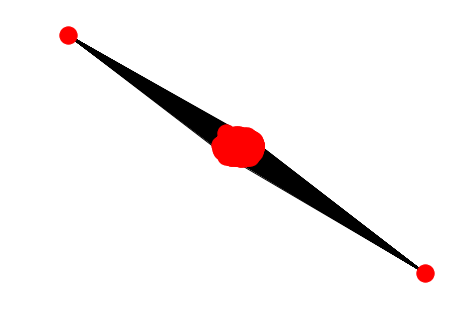

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 